In [1]:

import _init_
from constants import *
from set_path import *
from config import *
from functions import *
import seaborn as sns


In [80]:
plt.rcParams['font.size']=24
plt.rcParams['axes.linewidth']=4.1
plt.rcParams['xtick.major.size']=6
plt.rcParams['xtick.minor.size']=2
plt.rcParams['xtick.major.width']=2
plt.rcParams['xtick.minor.width']=2.
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.major.size']=12
plt.rcParams['ytick.minor.size']=6
plt.rcParams['ytick.major.width']=2
plt.rcParams['ytick.minor.width']=2
plt.rcParams['ytick.direction']='in'

In [3]:
grackledata = h5py.File(grackle)
array = grackledata['CoolingRates/Primordial/MMW'][()]
#density(1.e-6, 1.e4), redshift(0,15), temperature(10., 1.e9)
table = array[:,0,:]
table_nH   = np.logspace(-10, 4, array.shape[0])
table_temp = np.logspace(1,  9, array.shape[2])


In [4]:
i=0
bins = 100
egas_arr = np.logspace(-24., -5., bins)
nH_arr   = np.logspace(-6.0, 4.0, int(bins))
T = np.zeros((egas_arr.shape[0],nH_arr.shape[0]))


for egas in egas_arr:
    j=0
    for nH in nH_arr:
        C = (gamma - 1.) * egas / (boltzmann_constant_cgs*nH)
        minT = C*np.amin(table)
        maxT = C*np.amax(table)
        def func(T):
            mu = interpolate.interp2d(table_temp, table_nH, table,\
                              kind='linear', copy=True, bounds_error=False, fill_value=None)
            return C*mu(T,nH)[0] - T

        T[i,j] = scipy.optimize.toms748(func, minT, maxT)
        j+=1
    i+=1

In [5]:
home = '/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SummitData/GasGravity/Production2pc/'

data_folder = 'R8/slice-2600000.h5'
data_folder = 'R8/slice-2600000_379.h5'



In [6]:
folder = data_folder

data_path = os.path.join(home, folder)
hf = h5py.File(data_path ,'r')

eint = np.array(hf.get("IntEnergy"))
timestep = np.array(hf.get("Timestep")) 
temp = np.array(hf.get("Temperature")) 
zrange = np.array(hf.get("Zrange"))
xrange = np.array(hf.get("Xrange"))
rho_gas = np.array(hf.get("Rho")) 
rhoZ = np.array(hf.get("RhoZ")) 
vz = np.array(hf.get("Vz")) 
abund = (rhoZ/rho_gas)*Msun/1.e3


# cloudy_H_mass_fraction = 1. / (1. + 0.1 * 3.971)
# rho0 = rho_gas*cloudy_H_mass_fraction/hydrogen_mass_cgs

# logrho_arr = np.log10(nH_arr[:-1])
# logrho     = np.log10(rho0)
# delta_rho  = logrho_arr[1] - logrho_arr[0]
# idxrho     = (np.floor((logrho - np.amin(logrho_arr))/delta_rho)).astype('int')

# logEgas_arr = np.log10(egas_arr[:-1])
# logEgas     = np.log10(eint)
# delta_egas  = logEgas_arr[1] - logEgas_arr[0]
# idxegas     = (np.floor((logEgas-np.amin(logEgas_arr))/delta_egas)).astype('int')


# wgt_rho  = (logrho - (np.amin(logrho_arr) + delta_rho*idxrho))/delta_rho
# wgt_egas = (logEgas - (np.amin(logEgas_arr) + delta_egas*idxegas))/delta_egas

# temp = (1.-wgt_rho)*(1.-wgt_egas)* T[tuple(idxegas)  , tuple(idxrho)]   +\
#         wgt_rho *    wgt_egas * T[tuple(idxegas+1), tuple(idxrho+1)] +\
#     (1. -wgt_rho)*    wgt_egas * T[tuple(idxegas+1), tuple(idxrho)]   +\
#         wgt_rho *(1.-wgt_egas)* T[tuple(idxegas)  , tuple(idxrho+1)]  


# wgt_rho  = (logrho - (np.amin(logrho_arr) + delta_rho*idxrho))/delta_rho
# wgt_egas = (logEgas - (np.amin(logEgas_arr) + delta_egas*idxegas))/delta_egas

# temp = (1.-wgt_rho)*(1.-wgt_egas)* T[tuple(idxegas)  , tuple(idxrho)]   +\
#         wgt_rho *    wgt_egas * T[tuple(idxegas+1), tuple(idxrho+1)] +\
#     (1. -wgt_rho)*    wgt_egas * T[tuple(idxegas+1), tuple(idxrho)]   +\
#         wgt_rho *(1.-wgt_egas)* T[tuple(idxegas)  , tuple(idxrho+1)]  



# Get Halpha and X-ray

In [7]:
bins = 100
# temp_arr = np.logspace(1.0, 15.0, table.shape[0])

nH_arr   = np.logspace(-6.0, 4.0, table.shape[0])
temp_arr = np.logspace(1,  9, table.shape[1])
mu_interp = np.zeros((nH_arr.shape[0],temp_arr.shape[0]))

rho0       = rho_gas/hydrogen_mass_cgs
logrho_arr = np.log10(nH_arr[:-1])
logrho     = np.log10(rho0)
delta_rho  = logrho_arr[1] - logrho_arr[0]
idxrho     = (np.floor((logrho - np.amin(logrho_arr))/delta_rho)).astype('int')

logTgas_arr = np.log10(temp_arr[:-1])
temp_cutoff = np.ma.array(temp, mask=(temp>1.e9)).filled(fill_value=1.e9)
logTgas = np.log10(temp_cutoff)
delta_Tgas = logTgas_arr[1] - logTgas_arr[0]
idxTgas = (np.floor((logTgas-np.amin(logTgas_arr))/delta_Tgas)).astype('int')


wgt_rho  = (logrho - (np.amin(logrho_arr) + delta_rho*idxrho))/delta_rho
wgt_Tgas = (logTgas - (np.amin(logTgas_arr) + delta_Tgas*idxTgas))/delta_Tgas

mu_interp = (1.-wgt_rho)*(1.-wgt_Tgas)* table[tuple(idxrho), tuple(idxTgas)]   +\
           wgt_rho *    wgt_Tgas * table[tuple(idxrho+1), tuple(idxTgas+1)] +\
      (1. -wgt_rho)*    wgt_Tgas * table[tuple(idxrho)  , tuple(idxTgas+1)]   +\
           wgt_rho *(1.-wgt_Tgas)* table[tuple(idxrho+1), tuple(idxTgas)] 

In [8]:
temp_home = '/g/data/jh2/av5889/freshquokka/Analysis/ForDeanne/'
hf = h5py.File(temp_home + 'apec_emissivity_v3.h5', 'r')
E  = hf['E'][()]
ebin = np.diff(E)
mask = ((E[:-1]>0.5) & (E[:-1]<=2.0))

emissivity_metals =hf['emissivity_metals'][()]
emissivity_metals = emissivity_metals[:,mask]
emissivity_met_tot = np.sum(emissivity_metals*ebin[mask], axis=-1)

emissivity_primordial = hf['emissivity_primordial'][()]
emissivity_primordial = emissivity_primordial[:,mask]
emissivity_prim_tot = np.sum(emissivity_primordial*ebin[mask], axis=-1)

# emissvity_tot = emissivity_met_tot + emissivity_prim_tot
log_T = hf['log_T'][()]

xray_emissivity_met = scipy.interpolate.interp1d(log_T, emissivity_met_tot, kind='linear', axis=-1,\
                                                 fill_value="extrapolate")
xray_emissivity_prim = scipy.interpolate.interp1d(log_T, emissivity_prim_tot, kind='linear', axis=-1,\
                                                 fill_value="extrapolate")    


cloudy_H_mass_fraction = 1. / (1. + 0.1 * 3.971)
X = cloudy_H_mass_fraction
Z = 0.02
Y = 1. - X - Z
mean_metals_A = 16.
electron_mass_cgs = 9.1093897e-28
nH = rho_gas*cloudy_H_mass_fraction/hydrogen_mass_cgs

n_e = (rho_gas/hydrogen_mass_cgs) * (1.0 - mu_interp * (X + Y / 4. + Z / mean_metals_A)) 
n_e /=(mu_interp - (electron_mass_cgs /hydrogen_mass_cgs))


# met = (abund/np.amin(abund))

ZOinit = 8.6e-3
MO = 1. * Msun
rhoO = MO * rhoZ/1.e3 #1.e3 is the normalization of passive_sclar
abundance = rhoO/rho_gas   

met = rhoZ*Msun/1.e3/rho_gas
lum_xray_met  = n_e * nH * met * xray_emissivity_met(logTgas) 
lum_xray_prim = n_e * nH * xray_emissivity_prim(logTgas) 
total_xray_emissivity = lum_xray_met + lum_xray_prim
xray_cutoff = np.ma.array(total_xray_emissivity, mask=(temp<1.e5)).filled(fill_value=1.e-100)                                        

In [9]:
nH = rho_gas*cloudy_H_mass_fraction/hydrogen_mass_cgs

temp4 = (temp/1.e4)

alpha_Ha = 1.17e-13 * temp4**(-0.942-0.031*np.log(temp4))
Halpha = np.sum(alpha_Ha * n_e * nH * 2. * pc, axis=1)
Halpha_slice = alpha_Ha * n_e * nH

/jobfs/127133456.gadi-pbs/ipykernel_986076/3956751693.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot = ax[0].pcolormesh(xrange/kpc,zrange/kpc, np.transpose(np.log10(rho_gas/mp)),\
/jobfs/127133456.gadi-pbs/ipykernel_986076/3956751693.py:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot = ax[1].pcolormesh(xrange/kpc, zrange/kpc, np.transpose(temp),\
/jobfs/127133456.gadi-pbs/ipykernel_986076/3956751693.py:43: MatplotlibDeprecationWarning: shad

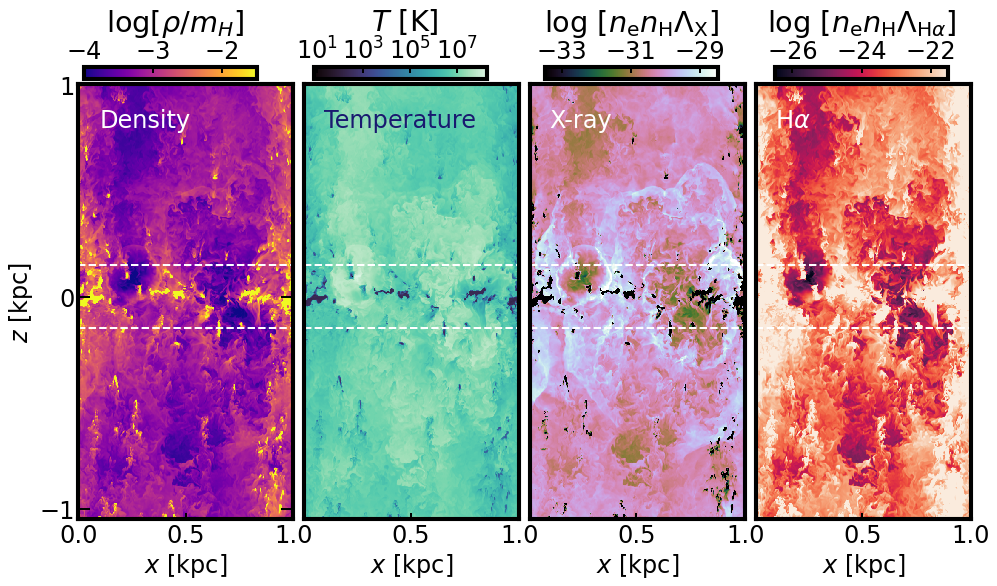

In [10]:
fig, ax = plt.subplots(1, 4, gridspec_kw = {'wspace':0.05, 'hspace':0.0},figsize=(16, 8))
i=0

cbarx = 0.13
cbheight = 0.02
cbary = 0.89
cblen = 0.15
dx1 = 0.2
cbtitlex = 0.1
cbtitley = 16.5

kk=0


plot = ax[0].pcolormesh(xrange/kpc,zrange/kpc, np.transpose(np.log10(rho_gas/mp)),\
                vmin=-4., vmax=-1.5,
                cmap=sns.color_palette(palette='plasma', as_cmap=True))
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(-6, -4, -3, -2.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\mathrm{log} [\rho/m_H]$" ) #+ "\n" + "[cm$^{-3}$]")


# plot = ax[1].pcolormesh(xrange/kpc,zrange/kpc, np.transpose(np.log10(abund/8.6e-3)),\
#                 vmin=-1., vmax=1.,
#                 cmap=sns.color_palette("Spectral", as_cmap=True))
# cax = fig.add_axes([cbarx + 1.*dx1, cbary, cblen, cbheight])
# fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(-1, 0., 1.))
# cax.xaxis.set_ticks_position('top')
# cax.set_title(r"$\mathrm{log}Z$ "+  r"$[Z_{\odot}]$")


plot = ax[1].pcolormesh(xrange/kpc, zrange/kpc, np.transpose(temp),\
                norm=mcolors.LogNorm(vmin=8., vmax=2.e8),
                        cmap=sns.color_palette(palette='mako', as_cmap=True))
#                 cmap=sns.diverging_palette(145, 300, s=40, as_cmap=True) )
cax = fig.add_axes([cbarx + 1.*dx1, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(1.e1, 1.e3, 1.e5, 1.e7))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $T$ [K]")


plot = ax[2].pcolormesh(xrange/kpc,zrange/kpc, np.log10(np.transpose(xray_cutoff)),\
                    vmin=-33.5, vmax=-28.5,cmap=sns.color_palette(palette='cubehelix', as_cmap=True))
cax = fig.add_axes([cbarx+2.*dx1, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(-33., -31., -29., -20.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r"$\mathrm{log}$ [$n_{\rm e} n_{\rm H}\Lambda_{\rm X}$]")


plot = ax[3].pcolormesh(xrange/kpc,zrange/kpc, np.transpose(np.log10((Halpha_slice))),\
                    vmin=-26.5, vmax=-21.5,cmap=sns.color_palette(palette='rocket', as_cmap=True))
cax = fig.add_axes([cbarx+3.*dx1, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(-26, -24., -22.,))
cax.xaxis.set_ticks_position('top')
cax.set_title(r"$\mathrm{log}$ [$n_{\rm e} n_{\rm H}\Lambda_{{\rm H}\alpha}$]")
ax[1].tick_params(axis='y', labelleft=False, labelright=True, right=True, left=True)

ax[0].tick_params(axis='y', labelleft=True, labelright=False, right=True, left=True)
color='white'
for i in range(4):
    if( i==1):color='white'
    else: color = 'white'
    ax[i].axhline(-0.15, ls= '--', lw=2., color=color)
    ax[i].axhline(0.15, ls='--', lw=2., color=color)
plt.setp(ax, 'ylim', (-1.05,1.))
plt.setp(ax, 'xlim', (0.01,1.0))
plt.setp(ax, 'xlabel', r'$x$ [kpc]')

ax[0].text(0.1, 0.8, 'Density', color='white')
ax[1].text(0.1, 0.8, 'Temperature', color='midnightblue')
ax[2].text(0.1, 0.8, 'X-ray', color='white')
ax[3].text(0.1, 0.8, r'H$\alpha$', color='white')

# ax[1].set_xlim(.0, 2.0)
plt.setp(ax, 'yticks', ())
plt.setp(ax[0], 'yticks', (-1., 0.0,1.0))
ax[0].set_xticks((0.0, 0.5, 1.0))

ax[0].set_ylabel(r'$z$ [kpc]')
# plt.setp(ax[1], 'xlim', (1.,2.))
# plt.setp(ax[2], 'xlim', (2.,3.))
# plt.setp(ax[3], 'xlim', (3.,4.))
# plt.setp(ax, 'xlabel', r'$x$ [kpc]')
# plt.setp(ax, 'xticks', (0.0,0.5))
# plt.setp(ax, 'yticks', (0.0,0.5, 1.0))

filename = fig_path + '/Paper/composite.jpeg'
# plt.savefig(filename, bbox_inches='tight', dpi=160)

In [ ]:


x, z = np.meshgrid(xrange/kpc, zrange/kpc) 
temp_masked = np.ma.masked_where(temp >= 2000, temp)
plt.contour(x, z, np.transpose(temp_masked), levels=[0], colors='blue')
# plt.contourf(x, z, np.transpose(temp_masked), levels=np.logspace(1, 5, 5), cmap='coolwarm')



In [14]:
zrange[index:].shape

(2048,)

/jobfs/127133456.gadi-pbs/ipykernel_986076/2350139937.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot = ax[0,0].pcolormesh(xrange/kpc,zrange/kpc, np.transpose(np.log10(rho_gas/mp)),\
/jobfs/127133456.gadi-pbs/ipykernel_986076/2350139937.py:37: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot = ax[0,1].pcolormesh(xrange/kpc, zrange/kpc, np.transpose(temp),\
/jobfs/127133456.gadi-pbs/ipykernel_986076/2350139937.py:47: MatplotlibDeprecationWarning: 

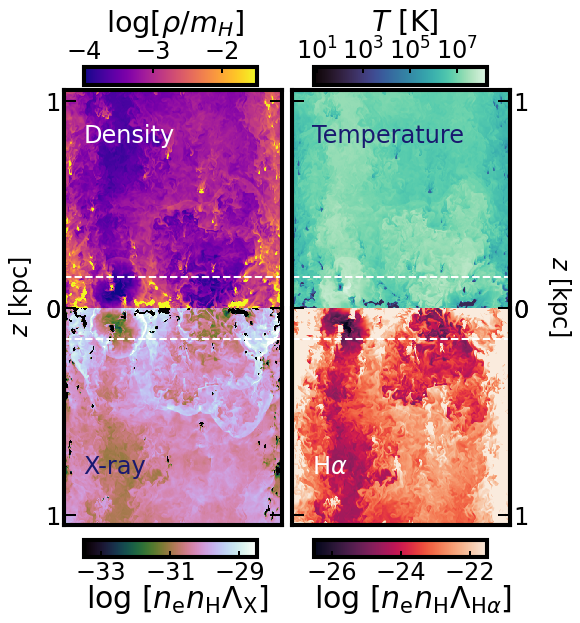

In [81]:
fig, ax = plt.subplots(2, 2, gridspec_kw = {'wspace':0.05, 'hspace':0.0},figsize=(8, 8))
i=0

cbarx = 0.16
cbheight = 0.03
cbary = 0.89
cblen = 0.3
dx1 = 0.4
cbtitlex = 0.1
cbtitley = 16.5


cbary_bot = 0.07

kk=0

index = int (zrange.shape[0]/2)

plot = ax[0,0].pcolormesh(xrange/kpc,zrange/kpc, np.transpose(np.log10(rho_gas/mp)),\
                vmin=-4., vmax=-1.5,
                cmap=sns.color_palette(palette='plasma', as_cmap=True))
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(-6, -4, -3, -2.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\mathrm{log} [\rho/m_H]$" ) #+ "\n" + "[cm$^{-3}$]")


# plot = ax[1].pcolormesh(xrange/kpc,zrange/kpc, np.transpose(np.log10(abund/8.6e-3)),\
#                 vmin=-1., vmax=1.,
#                 cmap=sns.color_palette("Spectral", as_cmap=True))
# cax = fig.add_axes([cbarx + 1.*dx1, cbary, cblen, cbheight])
# fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(-1, 0., 1.))
# cax.xaxis.set_ticks_position('top')
# cax.set_title(r"$\mathrm{log}Z$ "+  r"$[Z_{\odot}]$")


plot = ax[0,1].pcolormesh(xrange/kpc, zrange/kpc, np.transpose(temp),\
                norm=mcolors.LogNorm(vmin=8., vmax=2.e8),
                        cmap=sns.color_palette(palette='mako', as_cmap=True))
#                 cmap=sns.diverging_palette(145, 300, s=40, as_cmap=True) )
cax = fig.add_axes([cbarx + 1.*dx1, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(1.e1, 1.e3, 1.e5, 1.e7))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $T$ [K]")


plot = ax[1,0].pcolormesh(xrange/kpc,zrange/kpc, np.log10(np.transpose(xray_cutoff)),\
                    vmin=-33.5, vmax=-28.5,cmap=sns.color_palette(palette='cubehelix', as_cmap=True))
cax = fig.add_axes([cbarx+0.*dx1, cbary_bot, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(-33., -31., -29., -20.))
cax.xaxis.set_ticks_position('bottom')
# cax.set_title(r"$\mathrm{log}$ [$n_{\rm e} n_{\rm H}\Lambda_{\rm X}$]", location='bottom')


plot = ax[1,1].pcolormesh(xrange/kpc,zrange/kpc, np.transpose(np.log10((Halpha_slice))),\
                    vmin=-26.5, vmax=-21.5,cmap=sns.color_palette(palette='rocket', as_cmap=True))
cax = fig.add_axes([cbarx+1.*dx1, cbary_bot, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(-26, -24., -22.,))
cax.xaxis.set_ticks_position('bottom')
# cax.set_title(r"$\mathrm{log}$ [$n_{\rm e} n_{\rm H}\Lambda_{{\rm H}\alpha}$]")

plt.setp(ax[0,0], 'yticks', (0.0,1.0))
plt.setp(ax[0,1], 'yticks', (0.0,1.0))
plt.setp(ax[1,0], 'yticks', (1.0,0.0))
plt.setp(ax[1,1], 'yticks', (1.0,0.0))

ax[0,0].tick_params(axis='y', labelleft=True, labelright=False, right=True, left=True)
ax[0,1].tick_params(axis='y', labelleft=False, labelright=True, right=True, left=True)

ax[1,0].tick_params(axis='y', labelleft=True, labelright=False, right=True, left=True)
ax[1,1].tick_params(axis='y', labelleft=False, labelright=True, right=True, left=True)


ax[0,0].tick_params(axis='x', labelbottom=False, bottom=False)
ax[0,1].tick_params(axis='x', labelbottom=False, bottom=False)

ax[1,0].tick_params(axis='x', labelbottom=False, bottom=False)
ax[1,1].tick_params(axis='x', labelbottom=False, bottom=False)



for i in range(2):
    for j in range(2):
        ax[i,j].axhline(0.15, ls='--', lw=2., color='white')
        
# plt.setp(ax, 'ylim', (-1.05,1.))
plt.setp(ax, 'xlim', (0.01,1.0))
# plt.setp(ax, 'xlabel', r'$x$ [kpc]')

ax[0,0].set_ylim(0.0,1.05)
ax[0,1].set_ylim(0.0,1.05)
ax[1,0].set_ylim(1.05,0.0)
ax[1,1].set_ylim(1.05,0.0)

ax[0,0].text(0.1, 0.8, 'Density', color='white')
ax[0,0].text(-0.26, -0.1, r'$z$ [kpc]', color='black', rotation=90,  transform=ax[0,0].transAxes)
ax[0,1].text(0.1, 0.8, 'Temperature', color='midnightblue')
ax[1,0].text(0.1, 0.8, 'X-ray', color='midnightblue')
ax[1,1].text(0.1, 0.8, r'H$\alpha$', color='white')
ax[1,0].text(0.1, -0.38, r"$\mathrm{log}$ [$n_{\rm e} n_{\rm H}\Lambda_{\rm X}$]",\
             transform=ax[1,0].transAxes, fontsize=30)

ax[1,1].text(0.1, -0.38, r"$\mathrm{log}$ [$n_{\rm e} n_{\rm H}\Lambda_{{\rm H}\alpha}$]",\
             transform=ax[1,1].transAxes, fontsize=30)

ax[0,1].text(1.16, -0.1, r'$z$ [kpc]', color='black', rotation=270,  transform=ax[0,1].transAxes)


# ax[1].set_xlim(.0, 2.0)
ax[0,0].spines[['bottom']].set_visible(False)
ax[1,0].spines[['top']].set_visible(False)
ax[0,1].spines[['bottom']].set_visible(False)
ax[1,1].spines[['top']].set_visible(False)


# ax[0].set_xticks((0.0, 0.5, 1.0))

# ax[0,0].set_ylabel(r'$z$ [kpc]')
# ax[1,0].set_ylabel(r'$z$ [kpc]')
# plt.setp(ax[1], 'xlim', (1.,2.))
# plt.setp(ax[2], 'xlim', (2.,3.))
# plt.setp(ax[3], 'xlim', (3.,4.))
# plt.setp(ax, 'xlabel', r'$x$ [kpc]')
# plt.setp(ax, 'xticks', (0.0,0.5))
# plt.setp(ax, 'yticks', (0.0,0.5, 1.0))

filename = fig_path + '/Paper/composite1.jpeg'
plt.savefig(filename, bbox_inches='tight', dpi=160)

In [82]:
0.34**2 * (4.*0.34)

0.15721600000000005

In [ ]:
quokka = [2, 8]
smaug = [ 2, 0.15]
schneider = [5, ]